In [21]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [36]:
data = st.norm.rvs(size=100000)
#data = st.gamma(a=3.).rvs(size=100000)

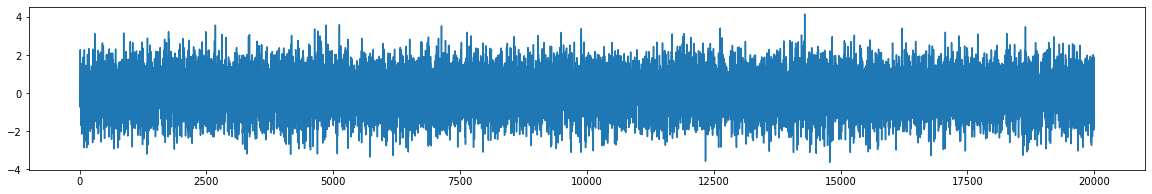

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(20, 3))
datarange = data.size//5
h = ax.plot(np.linspace(0, datarange, datarange), data[0:datarange])

In [38]:
block_size = 100
block_maxima = np.max(np.reshape(data, (data.size//block_size, block_size)), axis=1).flatten()

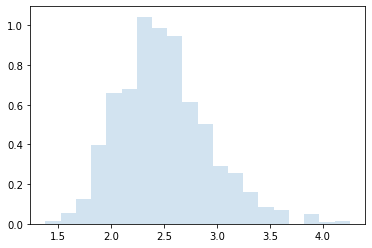

In [39]:
fig, ax = plt.subplots(1, 1)
h = ax.hist(block_maxima, bins=20, density=True, histtype='stepfilled', alpha=0.2)

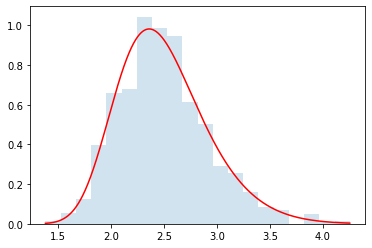

In [40]:
loc, scale, shape = st.genextreme.fit(block_maxima)
gev = st.genextreme(loc, scale, shape)
x = np.linspace(min(block_maxima), max(block_maxima), 1000)
fig, ax = plt.subplots(1, 1)
ax.plot(x, gev.pdf(x), color='r')
h = ax.hist(block_maxima, bins=20, density=True, histtype='stepfilled', alpha=0.2)

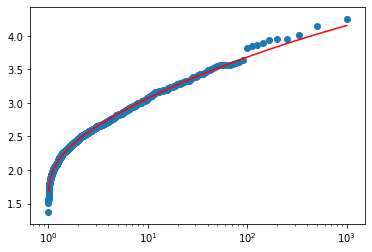

In [42]:
def get_cdf(m):
    return np.count_nonzero(block_maxima >= m)

return_periods = block_maxima.size/np.vectorize(get_cdf)(block_maxima)
fig, ax = plt.subplots(1, 1)
ax.set_xscale("log")
T = np.linspace(min(return_periods), max(return_periods), 100000)
ax.plot(T, gev.ppf(1-1/T), color='r')
h = ax.scatter(return_periods, block_maxima)